# Artificial Neural Networks: Classification using Fashion MNIST

In this project, we will work with the fashion MNIST dataset to carry out a classification exercise using Artificial Neural Networks.

## About the dataset

The dataset, Fashion MNIST, is a collection of apparel images falling into several classes. 
Classes are numbered from 0 to 9 and have the following meanings with Tshirt/Top represented as 0 and an Ankle Boot as 9. 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Objective

In this project, we will create a simple ANN model to classify the fashion images into categories.

## Toolkit

We will use TensforFlow, TensorFlow implementation of Keras on Google Colab for this classification exercise.

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tf.__version__

'2.6.0'

### Collect Data

Let's import the data from the tf.keras.datasets and prepare the train and the test set.

In [3]:
# Load the data

(X_train, trainY), (X_test,testY) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train.shape[1] * X_train.shape[2]

784

**Observations**
- This suggests that there are 60000 images of size 28\*28 in the training set and 10000 images of size 28*28 in the test set.
- Note that we will need to flatten these images before fitting an ANN model. 
- Let us now explore the classes present in the dataset.

In [6]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- This suggests that the train set has 10 classes where each class denotes one type of apparel.

### Encoding the target variable

- We need to one hot encode the target variable to be able to form the training target vector.
- Note: Check information on tf.keras.utils.to_categorical() - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [7]:
# Obtain categorical representations in the form of one-hot encoded vectors for
# both training and testing target vectors
y_train = tf.keras.utils.to_categorical(trainY, num_classes=10)
y_test = tf.keras.utils.to_categorical(testY, num_classes=10)

# Print the shapes of all the datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [8]:
## Normalize the dataset. Since there are pixel values ranging from 0-255, divide by 255 to get the new ranges from 0-1
X_train = X_train/255
X_test = X_test/255

### Visualization
- Now, let us visualize the data items.
- We will visualize first 24 images in the training dataset


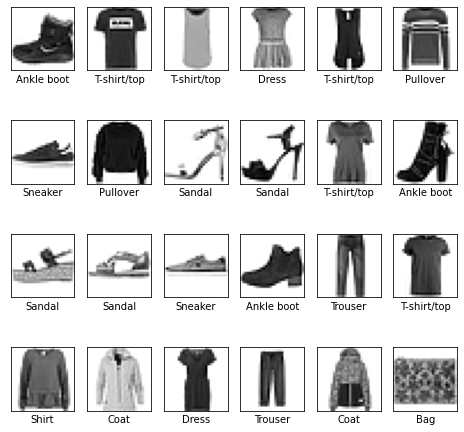

In [9]:
# Categorical labels
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print the first 24 images in the training dataset along with their categorical labels
plt.figure(figsize=(8,8))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
plt.show()

### Model Building

- We will now start with the model building process.
- We will create a model with
 - A layer to flatten the input
 - A hidden layer with 64 nodes (You can play around with this number) and 'relu' activation.
 - Output layer with 10 nodes 

In [10]:
# Initialize sequential model
model_1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                               tf.keras.layers.Dense(64, activation='relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')])

Let us now compile the model.
- We will use 'adam' optimization and CategoricalCrossentropy Loss as the loss. We will track the accuracy metric.

In [11]:
# Compile the model using adam optimization and categorical crossentropy as the loss
model_1.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])

In [12]:
# Fit the model
fit_history = model_1.fit(X_train, y_train, validation_split=0.1, verbose=1, epochs=10, batch_size=64)

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 0.5681 - accuracy: 0.8040 - val_loss: 0.4394 - val_accuracy: 0.8428
Epoch 2/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4122 - accuracy: 0.8559 - val_loss: 0.3829 - val_accuracy: 0.8632
Epoch 3/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3747 - accuracy: 0.8664 - val_loss: 0.3795 - val_accuracy: 0.8638
Epoch 4/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3495 - accuracy: 0.8755 - val_loss: 0.3833 - val_accuracy: 0.8658
Epoch 5/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3307 - accuracy: 0.8816 - val_loss: 0.3674 - val_accuracy: 0.8683
Epoch 6/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3163 - accuracy: 0.8866 - val_loss: 0.3556 - val_accuracy: 0.8730
Epoch 7/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3039 - accuracy: 0.8902 - val_loss: 0.3329 - val_accuracy: 0.8805
Epoch 

**Observations**
- We can observe that the model's accuracy increases with the increase in the number of epochs.
- For 10 epochs, we are getting an accuracy of about 89.98% for the training data and about 88.1% for the validation data.

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


**Observations**
- The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
- It also shows the total number of trainable and non-trainable parameters in the model. A parameter whose value is learned while training the model is called trainable parameter otherwise it is called a non-trainable parameter.
- The Flatten layer simply flattens each image into a size of 784 (28*28) and there is no learning or training at this layer. Hence, the number of parameters is 0 for the Flatten layer.
- Each image in the form of 784 nodes would be the input for the 'dense' layer. Each node of the previous layer would be connected with each node of the current layer. Also, each connection has one weight to learn and each node has one bias. So, the total number of parameters are (784*64)+64 = 50,240.
- Similarly, the last layer - 'dense_1' have (64*10)+10 = 650 parameters.

### Evaluate the model on the test set



- Let's predict using the test data. The .predict() method in Keras models returns the probabilities of each observation belonging to each class. We will choose the class where the predicted probability is the highest.
- Also, let's build a function to print the classification report and confusion matrix.


In [14]:
# Define a function to print a classification report and confusion matrix for the model
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=class_names_list, yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [15]:
# Evaluate the model
model_1.evaluate(X_test, y_test, verbose = 1)
test_pred = np.argmax(model_1.predict(X_test), axis = -1)
test_pred

313/313 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8736


array([9, 2, 1, ..., 8, 1, 5])

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.74      0.78      1000
           3       0.83      0.92      0.87      1000
           4       0.74      0.84      0.79      1000
           5       0.98      0.94      0.96      1000
           6       0.74      0.59      0.66      1000
           7       0.90      0.97      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



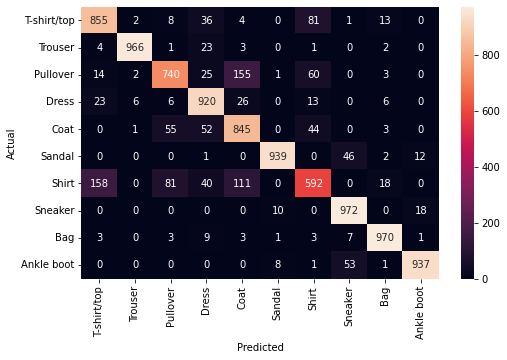

In [16]:
# Call our defined function to print the classification report and confusion matrix
metrics_score(testY, test_pred)

**Observations**
- The classification report shows the classification metrics - precision, recall, f1-score for each class. 
- We can see that class 1 (Trousers) and class 8 (Bag) have the highest f1-score of 98%. Even such a simple model can identify these objects quite appropriately.
- Class 6 (Shirt) has the lowest recall and precision. The model is not able to identify the shirt. The confusion matrix shows that the model has predicted shirts as T-shirts/tops, Pullover, and Coat which is understandable as these items have similar looks. 
- Let's try changing the learning rate and train the model for more epochs and see if the model can identify even subtle differences in different objects.

### Further Iterations to model building
- Let's change the learning rate and epochs and observe the effect on accuracy on the earlier network.
- Let's build a bigger network with the new learning rate and epochs.

In [17]:
# Initialize a new sequential model
model_2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                               tf.keras.layers.Dense(64, activation='relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')])

# Compile the new model using the adam optimizer and categorical crossentropy loss
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [18]:
# Fit the new model using 30 epochs
fit_history_2 = model_2.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=64, verbose = 2)

Epoch 1/30
844/844 - 2s - loss: 0.5533 - accuracy: 0.8103 - val_loss: 0.4313 - val_accuracy: 0.8457
Epoch 2/30
844/844 - 2s - loss: 0.4088 - accuracy: 0.8555 - val_loss: 0.3896 - val_accuracy: 0.8615
Epoch 3/30
844/844 - 2s - loss: 0.3750 - accuracy: 0.8665 - val_loss: 0.3720 - val_accuracy: 0.8638
Epoch 4/30
844/844 - 2s - loss: 0.3502 - accuracy: 0.8756 - val_loss: 0.3880 - val_accuracy: 0.8583
Epoch 5/30
844/844 - 2s - loss: 0.3307 - accuracy: 0.8814 - val_loss: 0.3596 - val_accuracy: 0.8727
Epoch 6/30
844/844 - 2s - loss: 0.3183 - accuracy: 0.8848 - val_loss: 0.3421 - val_accuracy: 0.8745
Epoch 7/30
844/844 - 2s - loss: 0.3030 - accuracy: 0.8907 - val_loss: 0.3340 - val_accuracy: 0.8802
Epoch 8/30
844/844 - 2s - loss: 0.2950 - accuracy: 0.8935 - val_loss: 0.3320 - val_accuracy: 0.8802
Epoch 9/30
844/844 - 2s - loss: 0.2838 - accuracy: 0.8961 - val_loss: 0.3395 - val_accuracy: 0.8802
Epoch 10/30
844/844 - 2s - loss: 0.2748 - accuracy: 0.9002 - val_loss: 0.3345 - val_accuracy: 0.8805

**Observations**
- We can see that the accuracy of the training data has increased by ~3.3% but the accuracy on the validation set has increased only by ~0.1% as compared to the model trained with 10 epochs.
- This indicates that if we further increase the number of epochs while keeping everything else the same then the model might start to overfit.

In [19]:
# Obtain a summary of this new model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


- The summary remains the same as the previous model because we have not changed anything about the structure of the NN.

Now, let's build another model with more nodes and layers. 

#### Add more nodes in the layer and add another hidden layer

In [20]:
# Initialize a third sequential model with another hidden layer
model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.Dense(64, activation='relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')])

# Compile the new model
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Fit the new model
fit_history_3 = model_3.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=64, verbose = 1)

Epoch 1/30
844/844 [==============================] - 4s 4ms/step - loss: 0.5211 - accuracy: 0.8173 - val_loss: 0.4360 - val_accuracy: 0.8392
Epoch 2/30
844/844 [==============================] - 3s 3ms/step - loss: 0.3764 - accuracy: 0.8650 - val_loss: 0.3731 - val_accuracy: 0.8635
Epoch 3/30
844/844 [==============================] - 3s 3ms/step - loss: 0.3382 - accuracy: 0.8764 - val_loss: 0.3570 - val_accuracy: 0.8675
Epoch 4/30
844/844 [==============================] - 3s 3ms/step - loss: 0.3141 - accuracy: 0.8832 - val_loss: 0.3605 - val_accuracy: 0.8742
Epoch 5/30
844/844 [==============================] - 3s 3ms/step - loss: 0.2988 - accuracy: 0.8899 - val_loss: 0.3556 - val_accuracy: 0.8695
Epoch 6/30
844/844 [==============================] - 3s 3ms/step - loss: 0.2803 - accuracy: 0.8956 - val_loss: 0.3325 - val_accuracy: 0.8797
Epoch 7/30
844/844 [==============================] - 3s 3ms/step - loss: 0.2694 - accuracy: 0.8998 - val_loss: 0.3252 - val_accuracy: 0.8832
Epoch 

**Observations**
- The validation accuracy of the model has further increased by ~0.6% and the training accuracy has further increased by ~1.7%. So, there is still a hint of overfitting. 
- We can play around with hyperparameters of the model, or try different layer structures to improve the model performance and/or reduce the overfitting.

In [21]:
# Obtain a summary of the third model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


**Observations**
- We can see that the number of parameters has increased by ~2.15 times the number of parameters in previous models.
- Increasing the number of parameters can significantly increase the training time of the model.

#### Visualizing the loss and accuracy on the train and validation data for all three models

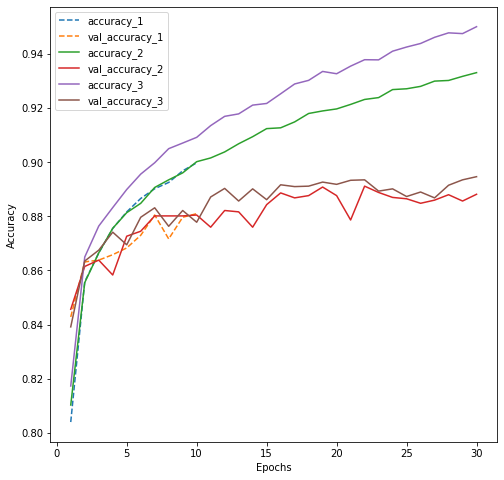

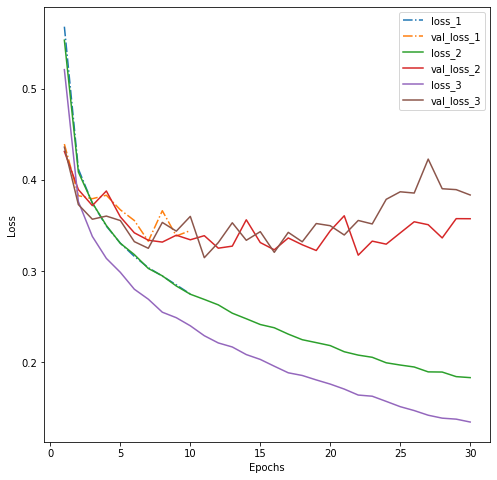

In [22]:
# History of each model
dict_hist = fit_history.history
dict_hist_2 = fit_history_2.history
dict_hist_3 = fit_history_3.history

# Numerical list used to map number of epochs used in each model
list_ep = [i for i in range(1, 11)]
list_ep30 = [i for i in range(1,31)]

# Plot a figure containing the accuracies for each model against the number of 
# epochs used
plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy_1')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy_1')
plt.plot(list_ep30,dict_hist_2['accuracy'], label = 'accuracy_2')
plt.plot(list_ep30,dict_hist_2['val_accuracy'], label = 'val_accuracy_2')
plt.plot(list_ep30,dict_hist_3['accuracy'], label = 'accuracy_3')
plt.plot(list_ep30,dict_hist_3['val_accuracy'], label = 'val_accuracy_3')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Plot a figure containing the loss values for each model against the number of
# epochs used
plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['loss'], ls = '-.', label = 'loss_1')
plt.plot(list_ep,dict_hist['val_loss'], ls = '-.', label = 'val_loss_1')
plt.plot(list_ep30,dict_hist_2['loss'],  label = 'loss_2')
plt.plot(list_ep30,dict_hist_2['val_loss'],  label = 'val_loss_2')
plt.plot(list_ep30,dict_hist_3['loss'],  label = 'loss_3')
plt.plot(list_ep30,dict_hist_3['val_loss'],  label = 'val_loss_3')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()



**Observations**
- We can see that accuracy keeps increasing for the test data as the number of epochs increased but validation accuracy has become somewhat constant after 10 epochs.
- This indicates that the model learns the training data more closely after each epoch but cannot replicate the performance on the validation data which is a sign of overfitting.
- The same pattern can be observed for loss as well. It keeps decreasing for the training data with the increase in epochs but becomes somewhat constant for the validation data after 10 epochs.

Now, let's make final predictions on the test data using the last model we built

#### Final Predictions on the Test Data

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.83      0.80      1000
           3       0.92      0.85      0.89      1000
           4       0.81      0.82      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.72      0.72      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



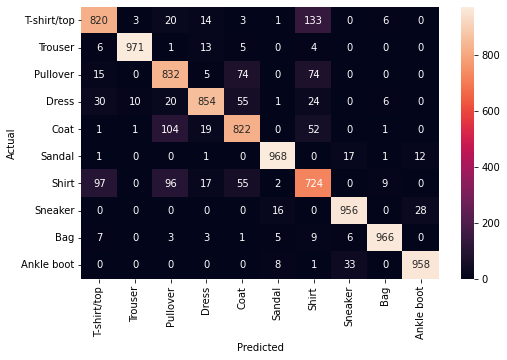

In [23]:
# Obtain the final predictions using the test data
final_pred = np.argmax(model_3.predict(X_test), axis  = -1)

# Use the function we defined to display the classification report and confusion matrix for the test data
metrics_score(testY, final_pred)

**Observations**
- The precision and recall for class 6 (shirt) have increased. The confusion matrix shows that the model is still not able to differentiate between T-shirt/top and shirts but became better in differentiating shirts with Pullover and Coat.
- The model has become even better at identifying trousers. It has an f1-score of 99% for class 1 (Trousers).
- The overall accuracy on the test data is 89% which is approximately the same as the validation accuracy.

## Visualizing the images from the test data
- We will randomly select 24 images from the test data and visualize them.
- The title of each image would show the actual and predicted label of that image and the probability of the predicted class. 
- Higher the probability more confident the model is about the prediction.

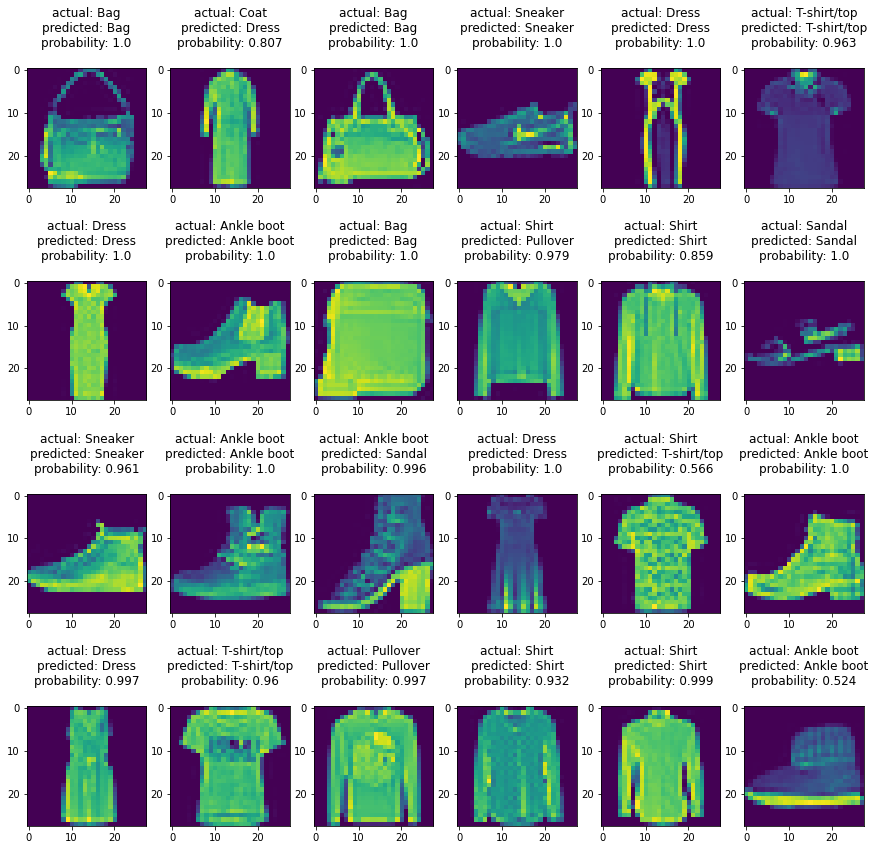

In [24]:
# Plot 24 randomly selected images from the testing data along with their predicted labels
rows = 4
cols = 6
fig = plt.figure(figsize=(15, 15))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(testY))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])
        pred_label = class_names_list[final_pred[random_index]]
        true_label = class_names_list[testY[random_index]]
        y_pred_test_max_probas = np.max(model_3.predict(X_test), axis=1)
        pred_proba = y_pred_test_max_probas[random_index]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

### Comments 

- We have trained 3 different models with some changes.
- The plots track the variation in the accuracies and the loss across epochs and allow us to map how better do these models generalize.
- We have observed good performance on the train set but there is some amount of overfitting in the models that get more prominent as we increase the epochs.
- We went ahead with the model 3 and evaluated the test data on it. We got an accuracy score of 89% with the classification report describing the class-wise recall and precision.
- Finally, we visualized some of the images from the test data.
